In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/Poorvi/OneDrive/Desktop/Titanic-Dataset.csv')

print(df.head()) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.shape)
print(df.info())


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


It is observed that we have missing values in the columns: Age, Cabin, Embarked. Missing values of Cabin will not be fixed since it won’t have much bearing on the analysis. 
Missing values of Embarked and Age will be fixed now.

In [7]:
port=df.Embarked.mode()
df.Embarked.fillna(value=port,inplace=True)
print(df.Embarked.isnull().sum())

2


In [8]:
mean_age=df.Age.mean()
df.Age.fillna(value=mean_age,inplace=True)

Data Analysis!!

In [9]:
sclass = df.groupby(['Pclass']).agg({'Survived': 'sum'})
tclass = df.groupby(['Pclass']).agg({'Pclass': 'count'})
tclass.rename(columns = {'Pclass':'Total'}, inplace = True)
df2 = pd.merge(sclass, tclass, left_index = True, right_index = True)
percent = (df2['Survived'] / df2['Total']) * 100
df2['Percentage'] = percent
print(df2)


        Survived  Total  Percentage
Pclass                             
1            136    216   62.962963
2             87    184   47.282609
3            119    491   24.236253


Conclusion:
As can be seen from the dataframe table - 1st Class passengers had highest rate of survival, then 2nd class passengers, and the least survival rates was of 3rd class passengers. A large number of passengers were travelling in 3rd class (491), but only 24.23% survived.

In [10]:
survived = df.groupby(['Sex']).agg({'Survived': 'sum'})
total = df.groupby(['Sex']).agg({'Survived': 'size'})
total.rename(columns = {'Survived':'Total'}, inplace = True)
df2 = pd.merge(survived, total, left_index = True, right_index = True)
percent = (df2['Survived'] / df2['Total']) * 100
df2['Percentage'] = percent
print(df2)


        Survived  Total  Percentage
Sex                                
female       233    314   74.203822
male         109    577   18.890815


Conclusion:
From the percentage of survival from the dataframe above - we can see that females had very high rate of survival. Female survial rate was 74.2%, and male survival rate was 18.9% - so female survival rate was about 4 times that of males.
It can be concluded that females were given preference in rescue operations, and males must have sacrificed themselves to let the females survive.

In [11]:
bins = [0, 18, 35, 50, 100]
label = ['0-18', '19-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = label)
df2 = df.groupby(['AgeGroup']).agg({'Survived': 'mean'})
print("Survival rate by age group: \n", df2)


C:\Users\Poorvi\AppData\Local\Temp\ipykernel_15524\2604290393.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['AgeGroup']).agg({'Survived': 'mean'})


Survival rate by age group: 
           Survived
AgeGroup          
0-18      0.503597
19-35     0.353271
36-50     0.398693
51+       0.343750


0-18 Age Group: Highest survival rate (approximately 50.36% survival)
19-35 Age Group: Around 35.6% survival
36-50 Age Group: Approximately 39.8% survival
51+ Age Group: Lowest survival rate (approximately 34% survival)
Conclusion:
Young passengers (0-18) had the highest chance of survival among the age groups analyzed. Generally, there is a trend of decreasing survival rates with increasing age.


In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['TravelingWithOthers'] = (df['FamilySize'] > 0).astype(int)
survived = df.groupby(['TravelingWithOthers']).agg({'Survived': 'mean'})
print("Survival Rate by Traveling With Others:\n", survived)


Survival Rate by Traveling With Others:
                      Survived
TravelingWithOthers          
0                    0.303538
1                    0.505650



•	Survival Rate for passengers traveling alone 
(TravelingWithOthers = 0): 30.35%
•	Survival Rate for passengers traveling with others (TravelingWithOthers = 1): 50.57%
Conclusion:
The higher survival rate for passengers traveling with others (TravelingWithOthers = 1) suggests that, individuals who were part of a family group (traveled with others) had a higher likelihood of survival compared to those who were traveling alone.


In [13]:
survival = df.groupby(['Pclass', 'Sex']).agg({'Survived': 'mean'}).unstack()
print("Male and Female Survival per Class:\n", survival)

Male and Female Survival per Class:
         Survived          
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


Conclusion:
We can conclude that female passengers generally had higher survival rates across all classes compared to males. Additionally, the survival rates tend to decrease with lower passenger class.

In [14]:
survival_rate = df.groupby(['Embarked']).agg({'Survived': 'mean'})
print(survival_rate)

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


Conclusion:
There seems to be a correlation between the port of embarkation and the likelihood of survival, with passengers from Cherbourg having the highest survival rate.

In [15]:
df['HasCabin'] = df['Cabin'].notna()
survival_rate = df.groupby('HasCabin').agg({'Survived': 'mean'})
print("Survival Rate by Having a Recorded Cabin:\n")
print(survival_rate)

Survival Rate by Having a Recorded Cabin:

          Survived
HasCabin          
False     0.299854
True      0.666667


Conclusion:
Passengers with a recorded cabin (HasCabin=True) had a much higher survival rate (66.67%) compared to those without a recorded cabin (HasCabin=False, 29.99%)
here appears to be a significant correlation between having a recorded cabin and a higher likelihood of survival.
Passengers with recorded cabins had approximately twice the survival rate compared to those without recorded cabins.


In [16]:
bins = [0, 18, 35, 50, 100]
label = ['0-18', '19-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = label)
df2 = df.groupby(['AgeGroup','Sex']).agg({'Survived': 'mean'}).unstack()
print("Survival Rate by Sex and Age Group:\n", df2)

Survival Rate by Sex and Age Group:
           Survived          
Sex         female      male
AgeGroup                    
0-18      0.676471  0.338028
19-35     0.751445  0.162983
36-50     0.732143  0.206186
51+       0.941176  0.127660


C:\Users\Poorvi\AppData\Local\Temp\ipykernel_15524\2957266560.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['AgeGroup','Sex']).agg({'Survived': 'mean'}).unstack()


Conclusion:
There is a clear trend of higher survival rates for females compared to males across different age groups.
Males generally had lower survival rates, with the lowest rate in the 51+ age group.

C:\Users\Poorvi\AppData\Local\Temp\ipykernel_15524\1086539344.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby(['AgeGroup','Sex']).agg({'Survived': 'mean'}).unstack()


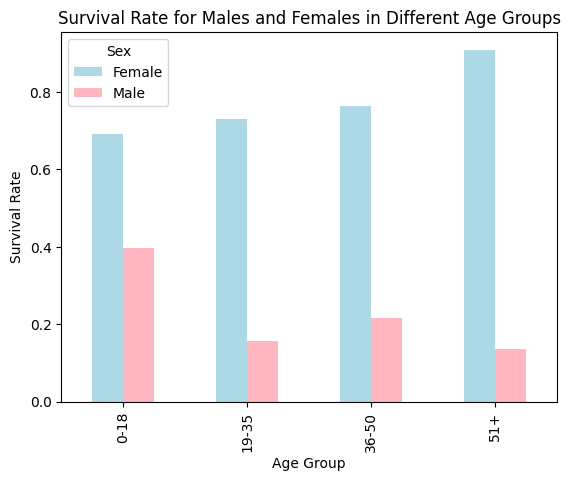

In [17]:
bins = [0, 18, 35, 50, 100]
label = ['0-18', '19-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'], bins = bins, labels = label,right=False)
survival = df.groupby(['AgeGroup','Sex']).agg({'Survived': 'mean'}).unstack()
survival.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate for Males and Females in Different Age Groups')
plt.legend(title='Sex', loc='upper left', labels=['Female', 'Male'])
plt.show()

Conclusion:
There is a clear trend of higher survival rates for females compared to males across different age groups.

        Survived
Pclass          
1            136
2             87
3            119


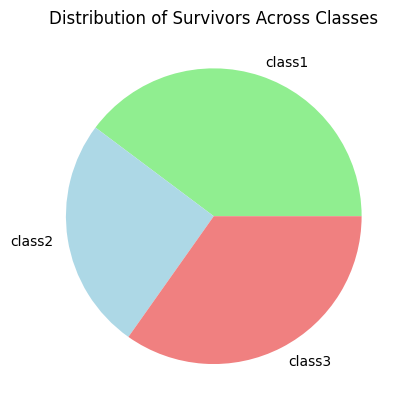

In [18]:
df2=df[df['Survived']==1]
survival_class=df2.groupby(df2['Pclass']).agg({'Survived':'count'})
print(survival_class)
plt.pie(survival_class['Survived'],labels=['class1','class2','class3'],colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Distribution of Survivors Across Classes')
plt.show()

Conclusion:
This graph indicates that there were more survivors in the first class compared to the second and third classes.